# Evaluate Walkthrough

## Let's load in our libraries and some data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from statsmodels.formula.api import ols
from math import sqrt
import split_scale
import warnings
warnings.filterwarnings('ignore')

tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## Next lets make a dataframe with only total_bill and tip in it so that we can make a model

In [2]:
df = tips[['total_bill', 'tip']]


In [3]:
train, test = split_scale.single_split_my_data(df, .7, 42)
train.head()

,total_bill,tip
235,15.53,3.00
228,20.45,3.00
181,34.65,3.68
6,25.29,4.71
57,38.01,3.00


## Next we will change the column names to convention

In [4]:
train.columns = ['x', 'y']
train.head()

,x,y
235,15.53,3.00
228,20.45,3.00
181,34.65,3.68
6,25.29,4.71
57,38.01,3.00


## Lets add a baseline using the mean

In [5]:
train['yhat_mean_baseline'] = train.y.mean()
train.head()

,x,y,yhat_mean_baseline
235,15.53,3.00,3.088941
228,20.45,3.00,3.088941
181,34.65,3.68,3.088941
6,25.29,4.71,3.088941
57,38.01,3.00,3.088941


## Now let's build a fast and dirty linear regression model

In [6]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=train).fit()
train['yhat'] = model.predict(train.x)
train.head()

,x,y,yhat_mean_baseline,yhat
235,15.53,3.00,3.088941,2.568077
228,20.45,3.00,3.088941,3.103834
181,34.65,3.68,3.088941,4.650125
6,25.29,4.71,3.088941,3.630880
57,38.01,3.00,3.088941,5.016008


## Now let's calculate our residuals for both the baseline and model

In [7]:
train['residual_baseline'] = train.yhat_mean_baseline - train.y
train.head()

,x,y,yhat_mean_baseline,yhat,residual_baseline
235,15.53,3.00,3.088941,2.568077,0.088941
228,20.45,3.00,3.088941,3.103834,0.088941
181,34.65,3.68,3.088941,4.650125,-0.591059
6,25.29,4.71,3.088941,3.630880,-1.621059
57,38.01,3.00,3.088941,5.016008,0.088941


In [8]:
train['residual'] = train.yhat - train.y
train.head()

,x,y,yhat_mean_baseline,yhat,residual_baseline,residual
235,15.53,3.00,3.088941,2.568077,0.088941,-0.431923
228,20.45,3.00,3.088941,3.103834,0.088941,0.103834
181,34.65,3.68,3.088941,4.650125,-0.591059,0.970125
6,25.29,4.71,3.088941,3.630880,-1.621059,-1.079120
57,38.01,3.00,3.088941,5.016008,0.088941,2.016008


## Let's plot the residuals against x to see how well each did predictor did

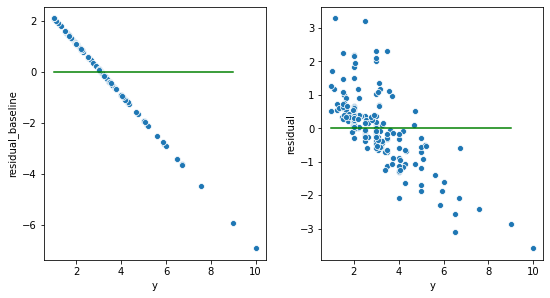

In [9]:
f, axes = plt.subplots(1, 2, figsize=(8, 4.5))

sns.scatterplot(x='y', y='residual_baseline', data=train, ax=axes[0])
sns.lineplot(x=range(round(train.y.min()), round(train.y.max())), y=0, color='green', ax=axes[0])

sns.scatterplot(x='y', y='residual', data=train, ax=axes[1])
sns.lineplot(x=range(round(train.y.min()), round(train.y.max())), y=0, color='green', ax=axes[1])

f.tight_layout(pad=2)

## Now lets calculate some evaluation stats of our models

In [10]:
from sklearn.metrics import mean_squared_error

SSE_baseline = mean_squared_error(train.y, train.yhat_mean_baseline)*len(train)
SSE_yhat = mean_squared_error(train.y, train.yhat)*len(train)
print("baseline SSE: ", SSE_baseline)
print("yhat SSE: ", SSE_yhat)

baseline SSE:  363.0590094117647
yhat SSE:  197.66533285047757


In [11]:
ESS_baseline = sum((train.yhat_mean_baseline - train.y.mean())**2)
ESS_yhat = sum((train.yhat - train.y.mean())**2)
print("baseline ESS: ", ESS_baseline)
print("yhat ESS: ", ESS_yhat)

baseline ESS:  0.0
yhat ESS:  165.39367656128715


In [12]:
TSS_baseline = ESS_baseline + SSE_baseline
TSS_yhat = ESS_yhat + SSE_yhat
print("baseline TSS: ", TSS_baseline)
print("yhat TSS: ", TSS_yhat)

baseline TSS:  363.0590094117647
yhat TSS:  363.0590094117647


In [13]:
MSE_baseline = mean_squared_error(train.y, train.yhat_mean_baseline)
MSE_yhat = mean_squared_error(train.y, train.yhat)
print("baseline MSE: ", MSE_baseline)
print("yhat MSE: ", MSE_yhat)

baseline MSE:  2.13564123183391
yhat MSE:  1.1627372520616328


In [14]:
RMSE_baseline = sqrt(MSE_baseline)
RMSE_yhat = sqrt(MSE_yhat)
print("baseline RMSE: ", RMSE_baseline)
print("yhat RMSE: ", RMSE_yhat)

baseline RMSE:  1.4613833281633912
yhat RMSE:  1.078302950038454


In [15]:
SSE_yhat < SSE_baseline

True

In [16]:
model.rsquared

0.4555559076450443

In [17]:
model.f_pvalue

5.976442030753118e-24

## Lets make some functions that do this for us

### First lets start with a function that creates those residual graphs

In [18]:
def plot_residuals(y, yhat, df, baseline=False):
    '''
    x: string; name of feature column
    y: string; name of target column
    yhat: string; name of prediction column
    df: DataFrame; dataframe that includes previously declared columns
    baseline: optional string; name of baseline column
    '''
    df['residuals'] = df[yhat] - df[y]
    
    if baseline:
        df['baseline'] = df.y.mean()
        df['baseline_residuals'] = df.baseline - df[y]
        
        f, axes = plt.subplots(1, 2, figsize=(8, 4.5))

        sns.scatterplot(x=y, y='baseline_residuals', data=df, ax=axes[0])
        sns.lineplot(x=range(round(df[y].min())-1, round(df[y].max())+1), y=0, color='green', ax=axes[0])

        sns.scatterplot(x=y, y='residuals', data=df, ax=axes[1])
        sns.lineplot(x=range(round(df[y].min())-1, round(df[y].max())+1), y=0, color='green', ax=axes[1])

        f.tight_layout(pad=2)
    
    else:
        sns.scatterplot(x=y, y='residuals', data=df)
        sns.lineplot(x=range(round(df[y].min()-1), round(df[y].max())+1), y=0, color='green')

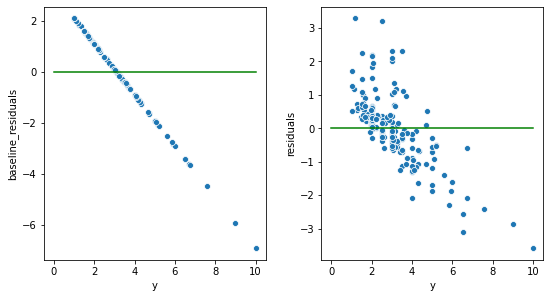

In [19]:
plot_residuals('y', 'yhat', train, 'yhat_mean_baseline')

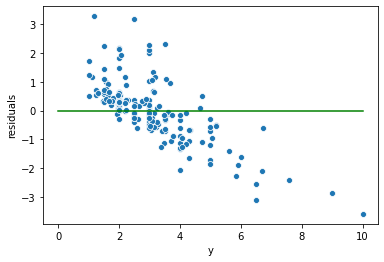

In [20]:
plot_residuals('y', 'yhat', train)

### Now lets make a function that just returns the values of the regression errors

In [21]:
def regression_errors(y, yhat):
    SSE_yhat = mean_squared_error(y, yhat)*len(y)
    ESS_yhat = sum((yhat - y.mean())**2)
    TSS_yhat = ESS_yhat + SSE_yhat
    MSE_yhat = mean_squared_error(y, yhat)
    RMSE_yhat = sqrt(MSE_yhat)
    
    return SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat

In [22]:
regression_errors(train.y, train.yhat)

(197.66533285047757,
 165.39367656128715,
 363.0590094117647,
 1.1627372520616328,
 1.078302950038454)

### Now lets make a function that returns the baseline errors

In [23]:
def baseline_mean_errors(y):
    df = pd.DataFrame(y)
    df['baseline'] = df.y.mean()
    
    SSE_baseline = mean_squared_error(df.y, df.baseline)*len(df)
    MSE_baseline = mean_squared_error(df.y, df.baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [24]:
baseline_mean_errors(train.y)

(363.0590094117647, 2.13564123183391, 1.4613833281633912)

### Now lets make a function that returns to use a table that displays these together

In [25]:
def regression_errors_table(y, yhat, baseline=False):
    '''
    y: pd.Series; Series of target values
    yhat: pd.Series; Series of predict values
    baseline: optional bool; if True, includes baseline on table for comparison
    '''
    error_df = pd.DataFrame(np.array(['SSE', 'ESS', 'TSS', 'MSE', 'RMSE']), columns=['metric'])
    
    if baseline:
        SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat = regression_errors(y, yhat)
        
        error_df['yhat_values'] = np.array([SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat])
        
        SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
        
        error_df['baseline_values'] = np.array([SSE_baseline, '', '', MSE_baseline, RMSE_baseline])
        
        return error_df
        
    else:
        SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat = regression_errors(y, yhat)
        
        error_df['yhat_values'] = np.array([SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat])
                
        return error_df

In [26]:
regression_errors_table(train.y, train.yhat)

,metric,yhat_values
0,SSE,197.665333
1,ESS,165.393677
2,TSS,363.059009
3,MSE,1.162737
4,RMSE,1.078303


In [27]:
regression_errors_table(train.y, train.yhat, True)

,metric,yhat_values,baseline_values
0,SSE,197.665333,363.0590094117647
1,ESS,165.393677,
2,TSS,363.059009,
3,MSE,1.162737,2.13564123183391
4,RMSE,1.078303,1.4613833281633912


### Now lets make a function that tells us whether our model works better that the baseline

In [28]:
def better_than_baseline(y, yhat):    
    SSE_yhat, ESS_yhat, TSS_yhat, MSE_yhat, RMSE_yhat = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    return RMSE_yhat < RMSE_baseline

In [29]:
better_than_baseline(train.y, train.yhat)

True

### Lastly lets make a function that tells us the significance values for our model

In [30]:
model.rsquared

0.4555559076450443

In [31]:
model.f_pvalue

5.976442030753118e-24

In [32]:
def model_significance(ols_model):
    return ols_model.rsquared, ols_model.f_pvalue

In [33]:
model_significance(model)

(0.4555559076450443, 5.976442030753118e-24)

## Now lets bring in some new data and and try out these functions

In [34]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### For this let's just isolate the two things that we want

In [35]:
mpg = mpg[['displ', 'hwy']]
mpg

,displ,hwy
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26
...,...,...
230,2.0,28
231,2.0,29
232,2.8,26
233,2.8,26


### Now let's split them into a train and test set

In [36]:
train, test = split_scale.single_split_my_data(mpg, .7, 13)
train.head()

,displ,hwy
205,3.4,19
29,5.3,19
93,4.0,26
141,5.0,17
230,2.0,28


### Now let's change the column names

In [37]:
train.columns = ['x', 'y']
train.head()

,x,y
205,3.4,19
29,5.3,19
93,4.0,26
141,5.0,17
230,2.0,28


## Now lets fit a model

In [38]:
model = ols('y ~ x', data=train).fit()
train['yhat'] = model.predict(train.x)
train.head()

,x,y,yhat
205,3.4,19,23.460614
29,5.3,19,17.166522
93,4.0,26,21.473006
141,5.0,17,18.160326
230,2.0,28,28.098366


## Now we can use our functions

In [39]:
train['baseline'] = train.y.mean()
train.head()

,x,y,yhat,baseline
205,3.4,19,23.460614,22.883436
29,5.3,19,17.166522,22.883436
93,4.0,26,21.473006,22.883436
141,5.0,17,18.160326,22.883436
230,2.0,28,28.098366,22.883436


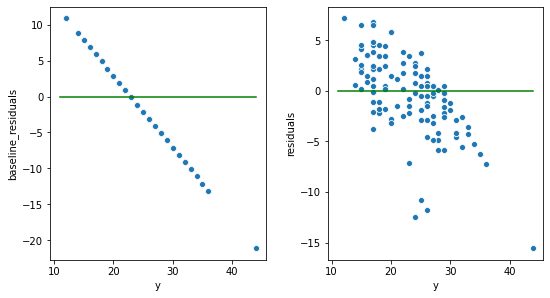

In [40]:
plot_residuals('y', 'yhat', train, baseline=True)

In [41]:
regression_errors(train.y, train.yhat)

(2217.5294696916453,
 3161.255806381974,
 5378.785276073619,
 13.604475274181873,
 3.6884244975574427)

In [42]:
baseline_mean_errors(train.y)

(5378.785276073619, 32.99868267529828, 5.744447986995642)

In [43]:
regression_errors_table(train.y, train.yhat, baseline=True)

,metric,yhat_values,baseline_values
0,SSE,2217.529470,5378.785276073619
1,ESS,3161.255806,
2,TSS,5378.785276,
3,MSE,13.604475,32.99868267529828
4,RMSE,3.688424,5.744447986995642


In [44]:
better_than_baseline(train.y, train.yhat)

True

In [45]:
model_significance(model)

(0.5877267160011289, 8.586644512241234e-33)